# Bingo Simualtor

```{image} img/portada.png
:alt: portada
:class: bg-primary mb-1
:width: 425px
:align: center
```

El primer capítulo fue sencillo, ¿verdad?. ¡Vamos a subir un poco el nivel de dificultad!. 

En este ejercicio vamos implementar una versión muy sencilla del popular juego del Bingo. Nuestro Bingo consiste en generar unas tarjetas con unos cuantos números aleatorios que irán saliendo posteriormente de un bombo. Los usuarios que antes completen sus tarjetas, ganan. La implementación de nuestro juego permitirá modificar su complejidad ofreciendo a los usuarios la posibilidad de juegar con cartones más grandes o más pequeños, así como de seleccionar la cantidad de números que podrían entrar en el bombo. Aprovecharemos nuestra implementación para realizar un sencillo análisis estadístico sobre su comportamiento.


```{seealso}
Puedes encontrar más información sobre este juego [aquí](https://en.wikipedia.org/wiki/Bingo_(American_version)).
```

## Generación del cartón 

En este apartado vamos a crear la función **generate_card(size, maximum)** para que devuelva los números del cartón de Bingo. Esta función recibe dos argumentos de entrada:

- **size** representa el tamaño de un cartón de **size** filas por **size** columnas
- **maximum** es el número de bolas que entran en el bombo del bingo

La función **generate_card(size, maximum)** tiene que devolver una lista de valores elegidos aleatoriamente entre 0 y **maximum**. Obviamente, no pueden salir dos números iguales dentro del mismo cartón. Por ejemplo:

In [44]:
card = generate_card(3, 20)
print(card)

[1, 7, 16, 8, 3, 19, 2, 18, 4]


::::{warning}
:class: warning
Es importante añadir a la función algún mecanismo que controle que el número de casillas de nuestro cartón no puede exceder el número de posibilidades del bombo como en este caso:

:::{code}
card = generar_carton(5, 20)
:::

En el ejemplo anterior estamos simulando un cartón de 25 casillas, pero nuestro bombo sólo contiene 20 números. Si no lo preveemos, la función **random.sample** generará una excepción del tipo **ValueError: Sample larger than population or is negative**.

::::

### Solución:

In [44]:
import random

def generate_card(size, maximum):
    if size*size>maximum:
        print("Error, card is larger than the number of balls in the drum")
        return []
    else:
        return random.sample(range(0, maximum), size*size)

In [20]:
generate_card(4, 100)

[23, 98, 15, 91, 92, 65, 22, 78, 43, 69, 47, 96, 77, 46, 87, 11]

:::{note}
En lugar de utilizar la función [random.sample](https://docs.python.org/3/library/random.html#random.sample) podríamos haber utilizado [rand.randint](https://docs.python.org/3/library/random.html#random.randint) que genera números enteros entre un valor mínimo y un valor máximo. Para utilizar la función [rand.randint](https://docs.python.org/3/library/random.html#random.randint) deberíamos haber implementado un mecanismo que verificara que el número generado no ha salido con anterioridad. Este problema no lo tenemos con la función [random.sample](https://docs.python.org/3/library/random.html#random.sample), ya que por definición devuelve **k** elementos únicos de una determinada población, en nuestro caso, una secuencia de números entre 0 y **maximum**. 
:::

:::{seealso}
De todas formas se propone al lector que intente resolverlo utilizando la función **randint** por lo que sería conveniente echar un ojo a su documentación [rand.randint](https://docs.python.org/3/library/random.html#random.randint).
:::

## Mostrar el cartón por pantalla

Una vez que tenemos una lista con los valores del cartón, necesitamos una función que los muestre por pantalla. Vamos a crear la función **print_card(card, numbers)** que recibe dos parámetros:

- **card** es una lista con los números de los que está compuesto el tablero (devueltos por la función generate_card())
- **numbers** es otra lista que contiene los números que ya han salido durante el progreso de la partida de Bingo

Ojo, esta función no devuelve nada, simplemente imprime el tablero por pantalla:

In [34]:
print_card([6, 4, 15, 8, 18, 1, 11, 17, 3], [])

|  6|  4| 15|
|  8| 18|  1|
| 11| 17|  3|


Si se invoca durante el progreso de una partida de Bingo y le pasamos la lista de los números que han salido con anterioridad, la función debe marcarlos con una X:

In [35]:
print_card([6, 4, 15, 8, 18, 1, 11, 17, 3], [1,2,3,4,5,6,7,8])

|  X|  X| 15|
|  X| 18|  X|
| 11| 17|  X|


### Solución:

In [45]:
import numpy as np
def print_card(card,numbers):
    side=int(np.sqrt(len(card)))
    index=0
    for row in range(side):
        for col in range(side):
            if card[index] not in numbers:
                print("|%3d" % card[index],end="")
            else:
                print("|%3s" % "X",end="")
            index+=1
        print("|")

In [39]:
card=generate_card(4, 100)
print_card(card,[])

| 22| 53| 83| 30|
| 57| 84| 56| 61|
| 34| 69| 36|  5|
| 88| 45| 23| 62|


::::{note}
Python dispone de muchas posibilidades para formatear las salidas por pantalla. Una de las más empleadas es la que hemos utilizado en la función **print_card**:

:::{code}
print("|%3d" % card[index],end="")
:::

El código **"%3d"** significa que Python va a reservar 3 espacios para el dígito que imprimiremos en esa posición.
::::

:::{seealso}
[Aquí](https://docs.python.org/3/tutorial/inputoutput.html#fancier-output-formatting) puedes leer más sobre diferentes formas de formatear strings.
:::

## Simular el bombo

Para simular el bombo del Bingo, vamos a crear función **simulate_drum(maximum,numbers)**. Esta función recibe dos argumentos de entrada: 

- **maximum** es una variable de tipo entero que contiene el valor del número más alto dentro del bombo
- **numbers** es una variable de tipo lista con la colección de los números que han salido con anterioridad

Cada vez que invoquemos a esta función debe devolver un número de entre los restantes:

In [24]:
new_number=simulate_drum(10,[0,1,2,3,4,5,6,7])
print("We got ball number: ", new_number)

We got ball number:  9


### Solución:

In [46]:
def simulate_drum(maximum,numbers):
    available=list(range(0,maximum))
    for i in numbers:
        available.remove(i)
    return random.sample(available,1)[0]

In [26]:
bola=simulate_drum(10,[0,1,2,3,4,5,7])
print("We got ball number: ",bola)

We got ball number:  8


```{note}
Esta es una de las múltiples maneras de resolver este problema. Podría haberse implementado un mecanismo iterativo que llamase a la función [rand.randint](https://docs.python.org/3/library/random.html#random.randint) y que verificase si el número generado ya había salido con anterioridad. El problema de este mecanismo es que cuantos menos números queden en el bombo más iteracciones haría falta para generar un número nuevo.
```

## Detección de fin de juego

El juego que estamos implementando va a ser automático. Esto quiere decir que no vamos a solicitar al usuario que verifique si el número que ha salido del bombo está o no en su cartón. Para ello vamos a necesitar una función que chequee automáticamente si nuestro cartón ha resultado premiado. Para ello vamos a implementar la función **game_over(card,numbers)**. Esta función recibe dos parámetros:

- **card** es una variable tipo lista que contien los números de nuestro cartón
- **numbers** es una variable tipo lista que contiene los números que han salido hasta el momento

La invocación de esta función debe devolver True cuando hayan salido del bombo todos los números del cartón y False en caso contrario.

In [27]:
victoria=game_over([1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9])
print("The game is over: ",victoria)

The game is over:  True


### Solución:

In [47]:
def game_over(card,numbers):
    match=[]
    for i in card:
        if i in numbers:
            match.append(True)
    if len(match)==len(card):
        return True
    else:
        return False

In [28]:
card=generate_card(2, 10)
print_card(card,[])
ganador=game_over(card,[1,2,3,4])
print("The game is over: ",ganador)

|  0|  8|
|  7|  3|
The game is over:  False


:::{note}
Esta solución se limita a recorrer todos los números del cartón y a verificar si se encuentran o no en la lista de números que ya han salido del bombo.
Este chequeo se puede hacer rápidamente con el operador **in**. 
:::

:::{seealso}
Puedes encontrar más información de este operador [aquí](https://docs.python.org/3/reference/expressions.html#in).
:::

## Implementación del juego

Para implementar el juego del Bingo hemos creado la siguiente función:

In [67]:
def play_bingo(size,maximum):
    numbers_from_the_drum=[]
    balls=0
    card=generate_card(size, maximum)
    print("="*(size*3+size+1))
    print_card(card,[])
    print("="*(size*3+size+1))
    while not game_over(card,numbers_from_the_drum):
        new_ball=simulate_drum(maximum,numbers_from_the_drum)
        print("New ball: ",new_ball)
        balls=balls+1
        numbers_from_the_drum.append(new_ball)
        print("="*(size*3+size+1))
        print_card(card,numbers_from_the_drum)
        print("="*(size*3+size+1))
    return balls

Esta función recibe los dos parámetros que permiten configurar el nivel de dificultad:

- **size** es una variable tipo entero con el número de filas y de columnas del cartón. Cuanto mayor sea esta variable, más números contendrá nuestro cartón y más complicado resultará completarlo
- **maximum** es una variable de tipo entero que describe el número de bolas que contiene el bombo del Bingo. Cuando mayor sea el valor de esta variable más números entrarán en el bombo y más complicado resultará completar un cartón

La salida de la función será el número de bolas que han tenido que salir del cartón hasta que se ha completado. El código siguiente solicita al usuario el nivel de dificultad mediante la introducción de un valor para ambas variables.

Para monitar el progreso de nuestro juego hemos incluido llamadas a la función **print_card** que irá mostrando progresivamente como completamos la tarjeta.

::::{note}
Habrás notado que para separar unos cartones de otros hemos incluido una fila con el símbolo **=**. La longitud de este símbolo la hemos calculado así:

:::{code}
print("="*(size*3+size+1))
:::

Dedícale un par de minutos a intentar entender el porqué de esta expresión.
::::

In [71]:
size=int(input("Number of rows for the card: "))
maximum=int(input("Number of balls for the drum: "))
attempts=play_bingo(size,maximum)
print("Number of attempts: ",attempts)

Number of rows for the card: 3
Number of balls for the drum: 20
| 19| 12| 17|
|  0| 11|  6|
| 16| 14| 13|
New ball:  11
| 19| 12| 17|
|  0|  X|  6|
| 16| 14| 13|
New ball:  15
| 19| 12| 17|
|  0|  X|  6|
| 16| 14| 13|
New ball:  14
| 19| 12| 17|
|  0|  X|  6|
| 16|  X| 13|
New ball:  18
| 19| 12| 17|
|  0|  X|  6|
| 16|  X| 13|
New ball:  6
| 19| 12| 17|
|  0|  X|  X|
| 16|  X| 13|
New ball:  16
| 19| 12| 17|
|  0|  X|  X|
|  X|  X| 13|
New ball:  0
| 19| 12| 17|
|  X|  X|  X|
|  X|  X| 13|
New ball:  12
| 19|  X| 17|
|  X|  X|  X|
|  X|  X| 13|
New ball:  9
| 19|  X| 17|
|  X|  X|  X|
|  X|  X| 13|
New ball:  5
| 19|  X| 17|
|  X|  X|  X|
|  X|  X| 13|
New ball:  10
| 19|  X| 17|
|  X|  X|  X|
|  X|  X| 13|
New ball:  19
|  X|  X| 17|
|  X|  X|  X|
|  X|  X| 13|
New ball:  17
|  X|  X|  X|
|  X|  X|  X|
|  X|  X| 13|
New ball:  7
|  X|  X|  X|
|  X|  X|  X|
|  X|  X| 13|
New ball:  1
|  X|  X|  X|
|  X|  X|  X|
|  X|  X| 13|
New ball:  3
|  X|  X|  X|
|  X|  X|  X|
|  X|  X| 13|
New b

Como los números salen del bombo de manera aleatoria, el número de bolas que hay que sacar para rellenar un cartón variará de una ejecución a otra. Si ejecutas la celda anterior varias veces, el número de intentos debería de variar. Si eres muy afortunado sólo tendrás que esperar 9 bolas para rellenar los 9 números de tu cartón. Si nunca se te han dado bien los juegos de azar, entonces tendrás que esperar a que el bombo se vacíe porque seguramente la última bola contenga un número de tu cartón.

En la ejecución anterior hemos tenido que esperar a que salgan 18 bolas del bombo para poder completar el cartón.

## Simulación

Vamos a investigar sobre el efecto del nivel de dificultad en nuestro juego. Para ello vamos a crear un código que simule un juego de Bingo en el que el tamaño de los cartones varíe de 1 a 9 filas (y columnas) y en el que el máximo valor que puede salir del bombo es el número 100.

Nuestro código debe ir almacenando el número de iteracciones necesarias para cada tamaño de cartón para posteriormente imprimir una gráfica en el que el eje X sean los tamaños de los cartones y el eje Y el número de bolas que han tenido que salir del bombo para completar cada cartón.

Para que nuestro resultado tenga cierta relevancia estadística, vamos a repetir la simulación de cada cartón hasta 10 veces. De esta forma, el valor que representamos en el eje Y será el promedio del número de bolas que hemos necesitado para cada valor del eje X.

::::{warning}
Si no quieres que tu notebook se sature con impresiones del cartón de bingo, tendrás que comentar los **prints** y las invocaciones a la función **print_card** de la función **play_bingo**.
Este es el código de la función **play_bingo** que deberías  usar antes de invocar la simulación de partidas.
:::{code}
def play_bingo(size,maximum):
    numbers_from_the_drum=[]
    balls=0
    card=generate_card(size, maximum)
    while not game_over(card,numbers_from_the_drum):
        new_ball=simulate_drum(maximum,numbers_from_the_drum)
        balls=balls+1
        numbers_from_the_drum.append(new_ball)
    return balls            
:::
::::

:::{note}
Puedes utilizar la libreria **matplotlib.pyplot** para representar los resultados de la simulación. 
:::

:::{seealso}
Puedes encontrar más información sobre esta librería [aquí](https://www.w3schools.com/python/matplotlib_pyplot.asp#in).
:::

### Solución:

In [42]:
balls=[]
maximum=100
for size in range(1,10):
    repetition=[]
    for repetitions in range(10):
        num=play_bingo(size,maximum)
        repetition.append(num)
    balls.append(np.mean(repetition))

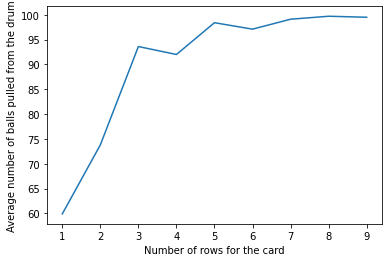

In [43]:
import matplotlib.pyplot as plt

X=range(1,10)
plt.plot(X,balls) 
plt.xlabel("Number of rows for the card")
plt.ylabel("Average number of balls pulled from the drum")
plt.show()

## Extensiones del juego

Si te ha sabido a poco, puedes complicar el juego con las siguientes propuestas:

* En el juego real, el premio máximo se consigue cuando se completa un cartón, pero también cuando se completan filas. Puedes implementar un mecanismo que detecte cuando se completan filas y repetir el análisis anterior
* Este juego es una simulación, puedes implementar una versión en el que se definan un número de jugadores y en el que cada jugador compre un cartón por una determinada cantidad. El total de lo recaudado formará parte del premio de aquel jugador que complete su cartón en primer lugar. El análisis estadístico de esta modalidad se vuelve más interesante porque podemos analizar si hay un determinado número de cartones que me permite maximizar los beneficios y el efecto del número de cartones vendidos
* Puedes intentar implementar alguna de las múltiples variaciones que existen en este juego. [Aquí](https://en.wikipedia.org/wiki/Bingo_(American_version)#Variations) se describen algunas.